# Color Identification in Images

Implement an image color detector which identifies all the colors in an image or video.

In [1]:
#IMPORTING NUMPY, PANDAS, OPENCV, MATPLOTLIB LIBRARIES.
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

%matplotlib inline

In [2]:
img = cv2.imread("img11.jpg")       #LOADING IMAGE INTO img VARIABLE

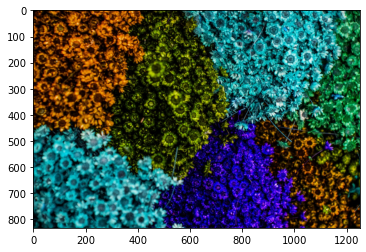

In [3]:
plt.imshow(img)                     #SHOWING THE IMAGING USING MATPLOTLIB AS PLT

In [4]:
print("Shape of image: {}".format(img.shape))

Shape of image: (833, 1250, 3)


Load the colors data set csv file to the variable csvfile.

In [5]:
index = ["color", "color_name", "hex", "R", "G", "B"]
csvfile = pd.read_csv('colors.csv', names=index, header=None)

In [6]:
print(csvfile.head(5))

                  color             color_name      hex    R    G    B
0    air_force_blue_raf   Air Force Blue (Raf)  #5d8aa8   93  138  168
1   air_force_blue_usaf  Air Force Blue (Usaf)  #00308f    0   48  143
2  air_superiority_blue   Air Superiority Blue  #72a0c1  114  160  193
3       alabama_crimson        Alabama Crimson  #a32638  163   38   56
4            alice_blue             Alice Blue  #f0f8ff  240  248  255


In [7]:
print("Element in color.csv file: {}".format(len(csvfile)))

Element in color.csv file: 865


In [8]:
csvfile.loc[0]

color           air_force_blue_raf
color_name    Air Force Blue (Raf)
hex                        #5d8aa8
R                               93
G                              138
B                              168
Name: 0, dtype: object

In [9]:
csvfile.loc[0,'R'], csvfile.loc[0,'B'], csvfile.loc[0,'G']

(93, 168, 138)

In [10]:
csvfile.loc[1,'R'], csvfile.loc[1,'B'], csvfile.loc[1,'G']

(0, 143, 48)

For easy convineance resize the image to a certain size whenever the images are huge or when we are working with multiple images of different dimensions.

In [11]:
img = cv2.resize(img, (900,900))
#print(img)

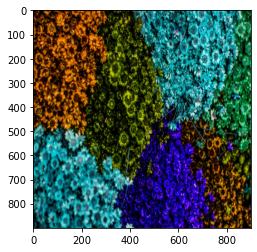

In [12]:
plt.imshow(img)  

In [13]:
#GLOBAL VARIABLES 
clickedOn = False
r = g = b = xposition = yposition = 0

Since we are doing color detection on image so we have created global variables that makes our work easy. Then we have to create a function that return the color on the image by double clicking. HERES THE MAGIC STARTS.

In [14]:
#COLOR RECOGNITION FUNCTION 
def colorFun(R,G,B):
    mincolor = 10000
    for i in range(len(csvfile)):
        d = abs(R - int(csvfile.loc[i,"R"])) + abs(G - int(csvfile.loc[i,"G"]))+ abs(B - int(csvfile.loc[i,"B"]))
        if d <= mincolor:
            mincolor = d
            cname = csvfile.loc[i,"color_name"]
    return cname

In [15]:
print(colorFun(0,0,0))        #PRINTING THE COLOR USING IT RGB VALUE

Black


In [16]:
print(colorFun(34,54,32))

Black Leather Jacket


In [17]:
#MOUSE CLICKING FUNCTION
def clickOn(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r,xposition,yposition, clickedOn
        clickedOn = True
        xposition = x
        yposition = y
        b,g,r = img[y,x]
        b = int(b)
        g = int(g)
        r = int(r)
        #print(b,g,r)

In [18]:
cv2.namedWindow('Color Recognition')

In [19]:
cv2.setMouseCallback('Color Recognition', clickOn)

In [20]:
while True:
    cv2.imshow("Color Recognition",img)
    if clickedOn:
        #cv2.rectangle(image, startpoint, endpoint, color, thickness)-1 fills entire rectangle
        cv2.rectangle(img,(20,20), (750,60), (b,g,r), -1)
        #Creating text string to display( Color name and RGB values )
        text = colorFun(r,g,b) + ' R='+ str(r) +  ' G='+ str(g) +  ' B='+ str(b)
        #cv2.putText(img,text,start,font(0-7),fontScale,color,thickness,lineType )
        cv2.putText(img, text,(50,50),2,0.8,(255,255,255),2,cv2.LINE_AA)
        #For very light colours we will display text in black colour
        if r+g+b>=600:
            cv2.putText(img, text,(50,50),2,0.8,(0,0,0),2,cv2.LINE_AA)
            
        clicked=False
        
    #Break the loop when user hits 'esc' key    
    if cv2.waitKey(20) & 0xFF ==27:
        break

cv2.destroyAllWindows()

Here we can conclude that by double clicking on the image we can find that colors rgb values.